In [2]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [4]:
deadpool_img=cv2.imread("C:\\Users\\thainguyen5484\\Downloads\\deadpool.png",1)
deadpool_img=deadpool_img[:,:,::-1]


In [5]:
deadpool_img.shape

(675, 1200, 3)

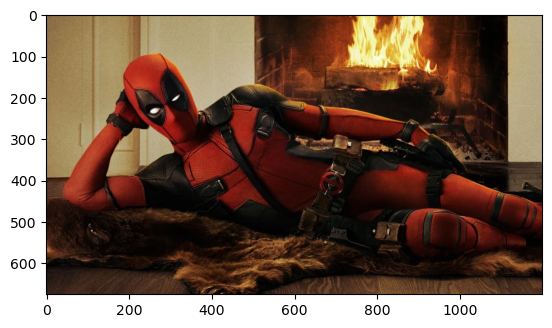

In [6]:
plt.imshow(deadpool_img)

In [7]:
## tính toán độ dài đường chéo 
def calculate_Diagonal(width:int,height:int):
    return int(math.sqrt(width**2+height**2))+1
## tạo ma trận đen để ánh xạ pixel lên đó
def create_black_matrix(diagonal_length:int):
    return np.full([diagonal_length,diagonal_length,3],0)
## tính toán tọa độ tâm ảnh
def calculate_center_coordinate(matrix):
    height,width=matrix.shape[:2]
    return height//2,width//2
## tính toán ma trận xoay
def calculate_rotation_matrix(degree:int):
    x=math.radians(degree)
    return np.array([[math.cos(x),-math.sin(x)],
                     [math.sin(x),math.cos(x)]])
## xoay vector
def linear_Transfomation(rotation_matrix,vector):
    return (np.round(rotation_matrix@vector)).astype(int)
## hàm xoay ảnh    
def image_Rotation(degree:int,image):
    ## lấy chiều cao và rộng để tính toán tọa độ tâm
    height,width=image.shape[:2]
    ## tạo ảnh đích cần ánh xạ (ma trận đen) dựa trên tổng số pixel đường chéo chính
    rotate_image=create_black_matrix(calculate_Diagonal(width,height))
    ## tính tọa độ tâm của ma trận đen
    x_center,y_center=calculate_center_coordinate(rotate_image)
    ## tính toán ma trận xoay
    rotation_matrix=calculate_rotation_matrix(degree)
    
    x_orgirin_center,y_orgirin_center=calculate_center_coordinate(image)
    for row in range(height):
        for col in range(width):
            ## chuyển tọa độ các điểm sang gốc tọa độ giữa
            translate_point=np.array([[row-x_orgirin_center]
                                     ,[col-y_orgirin_center]])
            ## biến đổi vector
            vector_transform=linear_Transfomation(rotation_matrix,translate_point)
            ## lấy tọa độ x của vector
            new_x=vector_transform[0,0]
            ## lấy tọa độ y của vector
            new_y=vector_transform[1,0]
            ## ánh xạ tọa độ vừa tính sang ảnh đích 
            rotate_image[x_center+new_x][y_center+new_y]=image[row][col]
    return rotate_image
## tham số 1: số độ xoay
## tham số 2: ảnh cần xoay

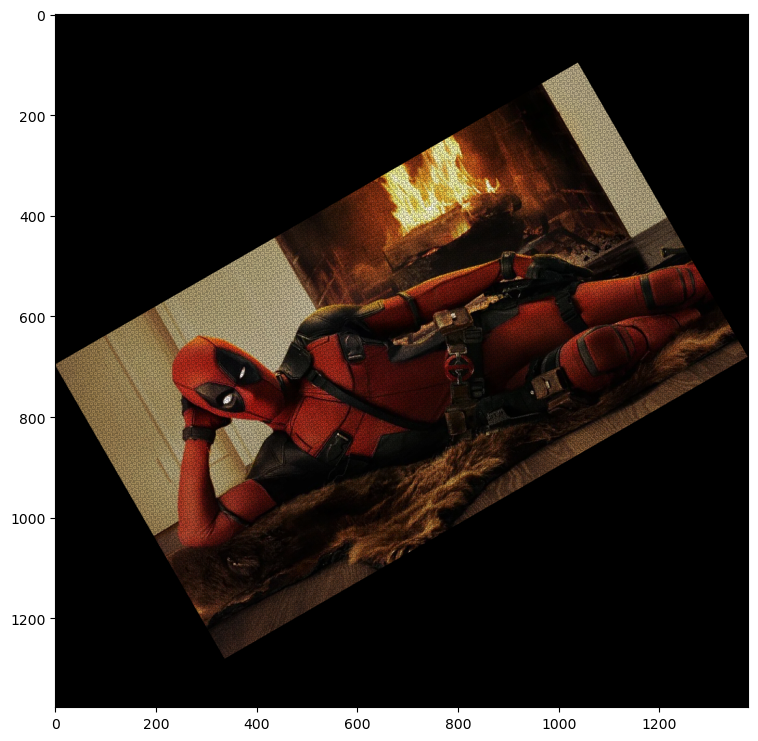

In [10]:
new_img=image_Rotation(30,deadpool_img)
plt.figure(figsize=(16,9))
plt.imshow(new_img)

In [15]:
# import math
# import numpy as np

# def calculate_Diagonal(width: int, height: int):
#     return int(math.sqrt(width**2 + height**2))

# def create_black_matrix(diagonal_length: int):
#     return np.full([diagonal_length, diagonal_length, 3], 0, dtype=np.uint8)

# def calculate_center_coordinate(matrix):
#     height, width = matrix.shape[:2]
#     return height // 2, width // 2

# def calculate_rotation_matrix(degree: int):
#     radians = math.radians(degree)
#     return np.array([[math.cos(radians), -math.sin(radians)],
#                      [math.sin(radians), math.cos(radians)]])

# def linear_Transfomation(rotation_matrix, vector):
#     return (rotation_matrix @ vector).astype(int)

# def image_Rotation(degree: int, image):
#     height, width = image.shape[:2]
    
#     # Calculate the size of the new image after rotation
#     diagonal_length = calculate_Diagonal(width, height)
#     rotate_image = create_black_matrix(diagonal_length)
    
#     # Find the center of the original and the new image
#     original_center_x, original_center_y = calculate_center_coordinate(image)
#     rotated_center_x, rotated_center_y = calculate_center_coordinate(rotate_image)
    
#     rotation_matrix = calculate_rotation_matrix(degree)
    
#     for row in range(height):
#         for col in range(width):
#             # Translate point to origin
#             translated_point = np.array([[row - original_center_x], 
#                                          [col - original_center_y]])
            
#             # Apply the rotation matrix
#             rotated_point = linear_Transfomation(rotation_matrix, translated_point)
            
#             # Translate back to the new image's coordinate system
#             new_x = rotated_center_x + rotated_point[0, 0]
#             new_y = rotated_center_y + rotated_point[1, 0]
            
#             if 0 <= new_x < diagonal_length and 0 <= new_y < diagonal_length:
#                 rotate_image[new_x, new_y] = image[row, col]
    
#     return rotate_image


In [16]:
# print(math.sin(math.radians(30)))

0.49999999999999994


In [8]:

# x=math.radians(40)
# rotation_matrix=np.array([[math.cos(x),-math.sin(x)],
#                           [math.sin(x),math.cos(x)]])
# vector1=np.array([[200],[300]])
# vector2=np.array([[201],[301]])

# print((np.round(rotation_matrix@vector1)).astype(int))
# print((np.round(rotation_matrix@vector2)).astype(int))

# (np.round(rotation_matrix@vector1)).astype(int)[0][0]

[[-40]
 [358]]
[[-40]
 [360]]


-40